# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [12]:
# Your code here
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
#log = pd.read_csv('PS_20174392719_1491204439457_log.csv')
log.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
log_df = log.sample(100000)

log_df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
log_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.00000,100000.0
mean,244.242790,1.807410e+05,8.313808e+05,8.528083e+05,1.089178e+06,1.213110e+06,0.00131,0.0
std,142.960568,6.270734e+05,2.892480e+06,2.924369e+06,3.250303e+06,3.524466e+06,0.03617,0.0
min,1.000000,2.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
25%,156.000000,1.327353e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
50%,249.000000,7.395422e+04,1.375950e+04,0.000000e+00,1.267809e+05,2.089291e+05,0.00000,0.0
75%,345.000000,2.077260e+05,1.058542e+05,1.439140e+05,9.219478e+05,1.094859e+06,0.00000,0.0
max,743.000000,7.382349e+07,4.958504e+07,3.958504e+07,1.907077e+08,1.905942e+08,1.00000,0.0


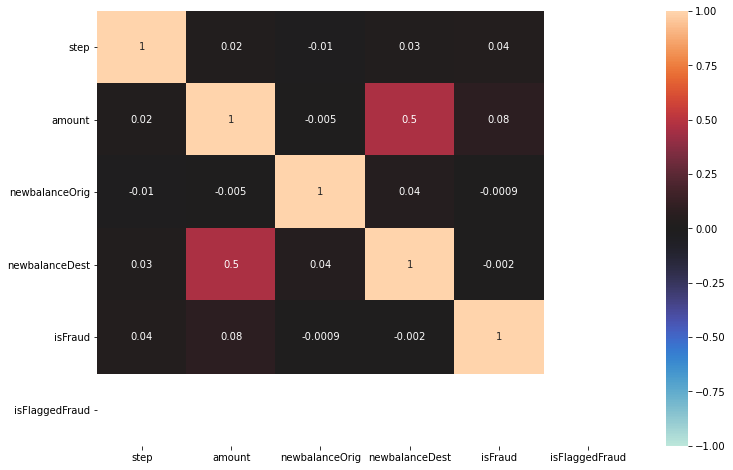

In [17]:
log_corr = log_df.corr()

fig, ax = plt.subplots(figsize=(12,8))
ax = sn.heatmap(log_corr, annot=True,fmt='.1g',vmin=-1, vmax=1, center=0)
plt.show()

In [14]:
log_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4541857,326,PAYMENT,5330.35,C1045893092,52863.00,47532.65,M752922046,0.00,0.00,0,0
4883750,348,CASH_IN,328073.80,C575201270,697178.62,1025252.42,C1841545425,3781308.03,3453234.23,0,0
2263256,187,PAYMENT,5722.93,C503119933,0.00,0.00,M1855756515,0.00,0.00,0,0
117119,11,PAYMENT,7484.61,C871627588,107221.00,99736.39,M2057704901,0.00,0.00,0,0
5972217,407,CASH_OUT,483180.96,C614082712,0.00,0.00,C454545882,1562294.54,2045475.50,0,0


In [15]:
log_df.drop(['oldbalanceDest','oldbalanceOrg'], axis=1,inplace=True)

In [23]:
log_df.isnull().sum()
log_df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
newbalanceOrig    float64
nameDest           object
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### What is the distribution of the outcome? 

(array([99869.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   131.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

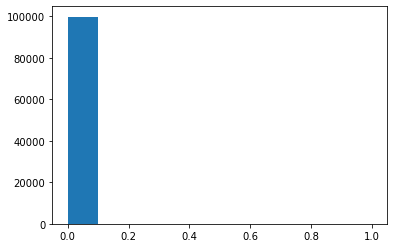

In [30]:
# Your response here
plt.hist(log_df['isFraud'])

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [35]:
# Your code here
log_df.head()

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
4541857,326,PAYMENT,5330.35,C1045893092,47532.65,M752922046,0.00,0,0
4883750,348,CASH_IN,328073.80,C575201270,1025252.42,C1841545425,3453234.23,0,0
2263256,187,PAYMENT,5722.93,C503119933,0.00,M1855756515,0.00,0,0
117119,11,PAYMENT,7484.61,C871627588,99736.39,M2057704901,0.00,0,0
5972217,407,CASH_OUT,483180.96,C614082712,0.00,C454545882,2045475.50,0,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [33]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
values = log_df[['step','amount','newbalanceOrig','newbalanceDest']]
prediction = log_df['isFraud']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(values, prediction, random_state=0)

In [45]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ", model.score(X_train, y_train))

test data accuracy was  0.99808
train data accuracy was  0.9975866666666666


### Now pick a model of your choice and evaluate its accuracy.

In [46]:
# Your code here
from sklearn.tree import DecisionTreeClassifier

In [48]:
model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)

print("test data accuracy was ",model.score(X_test,y_test))
# 100% on training data
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.99908
train data accuracy was  0.9994933333333333


### Which model worked better and how do you know?

In [2]:
# Your response here
#I think both models are a bit overfitting.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.